<div style="text-align:left">

## Iris Plants Recognition

#### Mt. SAC CISB 62 Midterm Project Fall 2023

#### Kevin Buriel
    
#### This project is about classifying three different Iris plants (Iris-Setosa, Iris-Versicolour and Iris-Virginica) and seeing how accurate the model I am using will be in predicting these plants given the hyperparameters being used.
    
</div>

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

#import warnings and ignore them
import warnings
warnings.filterwarnings('ignore')

import keras
from sklearn.model_selection import GridSearchCV
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout 
from keras import backend as K  # 

from scikeras.wrappers import KerasClassifier
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import confusion_matrix
import os

from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
from keras.layers import Flatten, Dropout
from tensorflow.keras.optimizers import Adam

### Exploratory Data Analysis (EDA)

In [2]:
data = datasets.load_iris()

### print the keys

In [3]:
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


### Display some information about the project

In [4]:
print(data.DESCR) 

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
# Read the DataFrame, first using the feature data
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add a target column, and fill it with the target data
df['target'] = data.target
# Show the first five rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [7]:
#Create the variables X, y.
#For X, assign the values from the dataset, except the first and last columns.
#For Y, assign the class value (the value in the last column)

X= df.iloc[:, 1:-1].values
y= df.iloc[:, -1].values

In [8]:
#print X
X[0]

array([3.5, 1.4, 0.2])

In [9]:
#print the shape of X
X.shape

(150, 3)

In [10]:
#print y
y[0]

0

In [11]:
#print the shape of y
y.shape

(150,)

### split the dataset

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
#feature scaling, create a variable to use StandardScaler
sc = StandardScaler()

In [16]:
# use sc.fit_transform for both X_train and X_test

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
#display the shape of X_train
X_train.shape

(120, 3)

In [18]:
#display X_train
X_train[0]

array([ 1.20365799, -1.56253475, -1.31260282])

In [19]:
#display the shape of X_test
X_test.shape

(30, 3)

## Applying Deep Learning techniques

In [20]:
#initializing the ANN
#use a sequential model
#add layer
#second layer
#compile model

# add a sequential model
model = Sequential()

# Adding the first layer 
model.add(Dense(8, input_shape=(None, 5,3), activation='relu'))


# Adding the output layer
model.add(Dense(3, activation='softmax'))


# Compiling the ANN
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
#summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, None, 5, 8)        32        
                                                                 
 dense_1 (Dense)             (None, None, 5, 3)        27        
                                                                 
Total params: 59 (236.00 Byte)
Trainable params: 59 (236.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
#use model.fit to train the ANN
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=5, epochs=10)

Epoch 1/10
24/24 [==============================] - 0s 5ms/step - loss: 1.1024 - accuracy: 0.3333 - val_loss: 1.0027 - val_accuracy: 0.3333
Epoch 2/10
24/24 [==============================] - 0s 1ms/step - loss: 0.9936 - accuracy: 0.3583 - val_loss: 0.9060 - val_accuracy: 0.4000
Epoch 3/10
24/24 [==============================] - 0s 1ms/step - loss: 0.8989 - accuracy: 0.4250 - val_loss: 0.8194 - val_accuracy: 0.5333
Epoch 4/10
24/24 [==============================] - 0s 1ms/step - loss: 0.8188 - accuracy: 0.6333 - val_loss: 0.7439 - val_accuracy: 0.7333
Epoch 5/10
24/24 [==============================] - 0s 1ms/step - loss: 0.7479 - accuracy: 0.7500 - val_loss: 0.6814 - val_accuracy: 0.7667
Epoch 6/10
24/24 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.7667 - val_loss: 0.6269 - val_accuracy: 0.7667
Epoch 7/10
24/24 [==============================] - 0s 1ms/step - loss: 0.6407 - accuracy: 0.7750 - val_loss: 0.5828 - val_accuracy: 0.7667
Epoch 8/10
24/24 [==

### Visualize the Model Loss

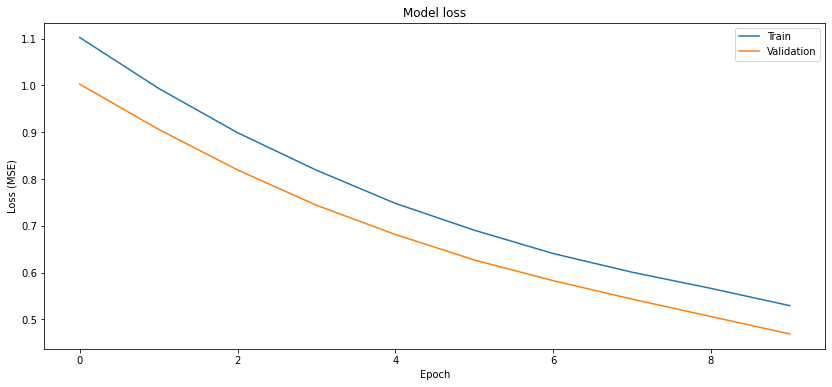

In [23]:
#plot the model loss vs epocs
plt.figure(figsize=(14,6))
plt.plot(model.history.history['loss'][:])
plt.plot(model.history.history['val_loss'][:])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### Print accuracy

In [24]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test accuracy
print(f'Test accuracy: {test_accuracy}')

1/1 [==============================] - 0s 63ms/step - loss: 0.4688 - accuracy: 0.8000
Test accuracy: 0.800000011920929


In [25]:
from sklearn.metrics import mean_absolute_error 

In [26]:
# display the prediction of first 5 values, then calculate mae, lastly print first 5 predictions
# Let's check how much we are off on average 
# Use model.predict to get class probabilities
y_pred_probabilities = model.predict(X_test)

# Extract class predictions from probabilities
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred_classes)
y_pred_probabilities[0:5]

1/1 [==============================] - 0s 43ms/step


array([[0.15298657, 0.40996367, 0.43704975],
       [0.83843756, 0.12202214, 0.03954037],
       [0.00114501, 0.16997765, 0.82887733],
       [0.08269878, 0.3768618 , 0.5404394 ],
       [0.07953572, 0.39323   , 0.52723426]], dtype=float32)

In [27]:
#print mae value
mae

0.2

In [28]:
#print the real value of record 19
y_pred_probabilities[19]

array([0.0046897 , 0.23519151, 0.7601187 ], dtype=float32)

In [29]:
#use model.predict and numpy reshape, print the predicted value of the same # above
model.predict(np.reshape(X_test[19], [1,-1]))

1/1 [==============================] - 0s 11ms/step


array([[0.0046897 , 0.23519151, 0.7601188 ]], dtype=float32)

#### Confusion Matrix

In [30]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

In [31]:
# Look at confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

1/1 [==============================] - 0s 11ms/step


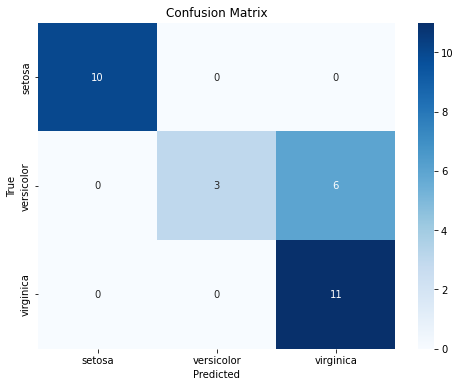

In [32]:
# Get predicted probabilities
y_pred_probs = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate and plot the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Tuning Hyperparameters

In [33]:
import os
import shutil
import tempfile

# Create a temporary directory for Hyperparameter tuning
tuner_dir = tempfile.mkdtemp()

try:
    # Example: Removing the temporary directory and its contents
    shutil.rmtree(tuner_dir)
    print(f"The temporary folder '{tuner_dir}' has been deleted.")
except Exception as e:
    print(f"An error occurred: {e}")

The temporary folder 'C:\Users\Beast\AppData\Local\Temp\tmp8soegqyd' has been deleted.


In [34]:
# Create a model-building function
def model_builder(hp):
    
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(units=hp.Int('dense_units_1', min_value=24, max_value=32, step=4),
                         activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile( optimizer= Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [35]:
tuner = RandomSearch(
    model_builder,
    objective='val_accuracy',
    max_trials=10,
    directory=tuner_dir,  # Use the temporary directory here
    project_name='intro_to_kt'
)

In [36]:
# Search the hyperparameters to see which combination provides the best model result
tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Trial 8 Complete [00h 00m 01s]
val_accuracy: 0.6333333253860474

Best val_accuracy So Far: 0.6333333253860474
Total elapsed time: 00h 00m 06s
INFO:tensorflow:Oracle triggered exit


In [37]:
# Retrieve the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [38]:
# Display the best hyperparameters
print(f"The hyperparameter search is complete.")
print(f"The optimal number of neurons is {best_hps.get('dense_units_1')}.")

The hyperparameter search is complete.
The optimal number of neurons is 32.


In [39]:
# Create the final model with the optimal hyperparameters
final_model = tuner.hypermodel.build(best_hps)

In [40]:
# Fit model
history = final_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
4/4 [==============================] - 0s 29ms/step - loss: 0.7237 - accuracy: 0.4000 - val_loss: 0.4112 - val_accuracy: 0.5333
Epoch 2/10
4/4 [==============================] - 0s 6ms/step - loss: 0.3220 - accuracy: 0.6167 - val_loss: 0.0145 - val_accuracy: 0.6333
Epoch 3/10
4/4 [==============================] - 0s 7ms/step - loss: -0.0160 - accuracy: 0.6750 - val_loss: -0.3386 - val_accuracy: 0.6333
Epoch 4/10
4/4 [==============================] - 0s 8ms/step - loss: -0.3255 - accuracy: 0.6750 - val_loss: -0.6891 - val_accuracy: 0.6333
Epoch 5/10
4/4 [==============================] - 0s 6ms/step - loss: -0.6397 - accuracy: 0.6750 - val_loss: -1.0593 - val_accuracy: 0.6333
Epoch 6/10
4/4 [==============================] - 0s 7ms/step - loss: -0.9535 - accuracy: 0.6750 - val_loss: -1.4659 - val_accuracy: 0.6333
Epoch 7/10
4/4 [==============================] - 0s 7ms/step - loss: -1.3271 - accuracy: 0.6750 - val_loss: -1.9198 - val_accuracy: 0.6333
Epoch 8/10
4/4 [=======

In [41]:
# Find the best epoch
val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('The best epoch: %d' % (best_epoch,))

The best epoch: 2


In [42]:
# Evaluate the model
eval_result = final_model.evaluate(X_train, y_train)
print("[test loss, test accuracy]:", eval_result)

4/4 [==============================] - 0s 1ms/step - loss: -3.1001 - accuracy: 0.6750
[test loss, test accuracy]: [-3.1000757217407227, 0.675000011920929]


### Plot accuracy, CM, Loss, etc. 

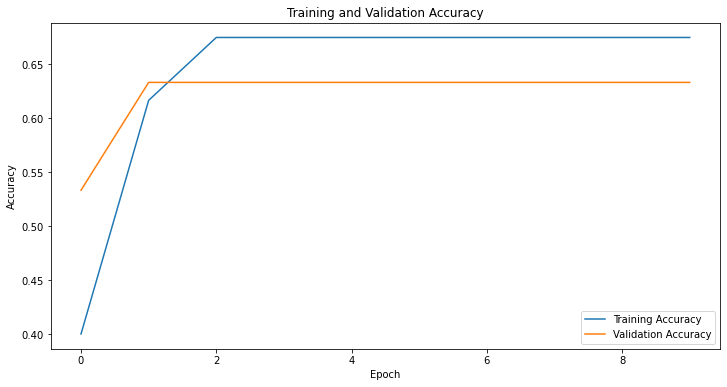

In [43]:
# Extract training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

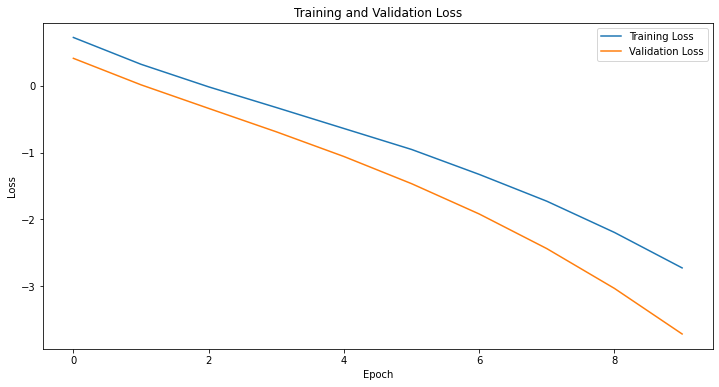

In [44]:
# Plot loss
plt.figure(figsize=(12, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

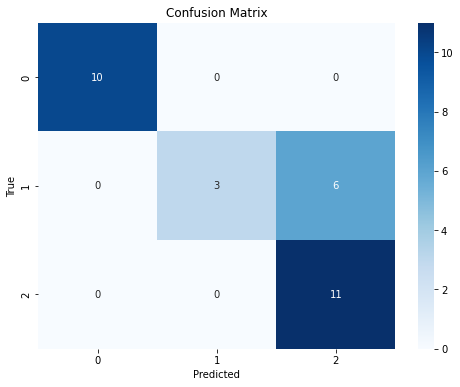

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_pred is the model's predictions on the test data
confusion = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Conclusions

### Overall, the first model performed better. We see that the original model had a higher prediction of 80% versus the final hypertuned model with an accuracy of 67.5%. This can mean that the hypertuned model had a problem of overfitting, possibly because the dataset of the Iris plants is small, so the model may be too complex. 